TensorFlow Version: 2.19.0

--- Unzipping and Loading Data ---
Files extracted successfully.
Data Loaded. Shape: (20000, 785)

--- Preprocessing Images ---
Training set: (16000, 28, 28, 1)
Test/Validation set: (4000, 28, 28, 1)
Number of classes: 10

--- Building CNN Model ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)


--- Training Model ---
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 223ms/step - accuracy: 0.7603 - loss: 0.9184 - val_accuracy: 0.4305 - val_loss: 1.5768
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 228ms/step - accuracy: 0.9525 - loss: 0.1526 - val_accuracy: 0.7103 - val_loss: 0.8533
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.9712 - loss: 0.0961 - val_accuracy: 0.9230 - val_loss: 0.2782
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 234ms/step - accuracy: 0.9771 - loss: 0.0683 - val_accuracy: 0.9707 - val_loss: 0.0994
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9818 - loss: 0.0503 - val_accuracy: 0.9833 - val_loss: 0.0484
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.9844 - loss: 0.0474 - val_accuracy: 0.9808 - val_loss: 0.0628
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - accuracy: 0.9855 - loss: 0.0382 - val_accuracy: 0.9825 - val_loss: 0.0602
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - ac

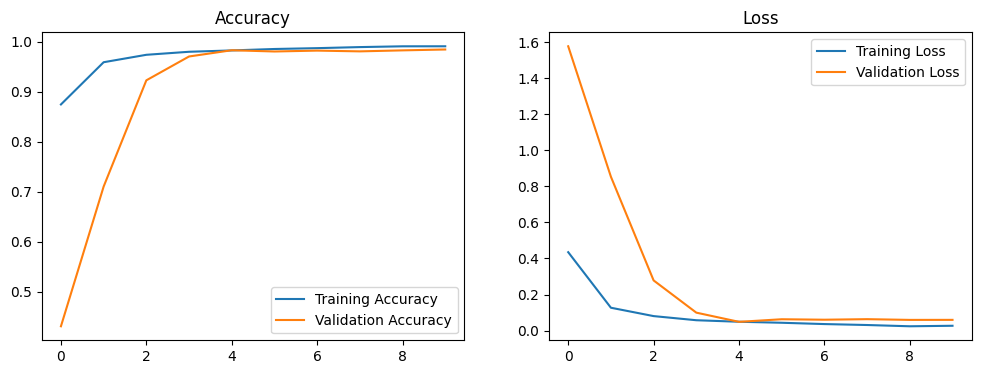


--- Evaluating Model ---
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


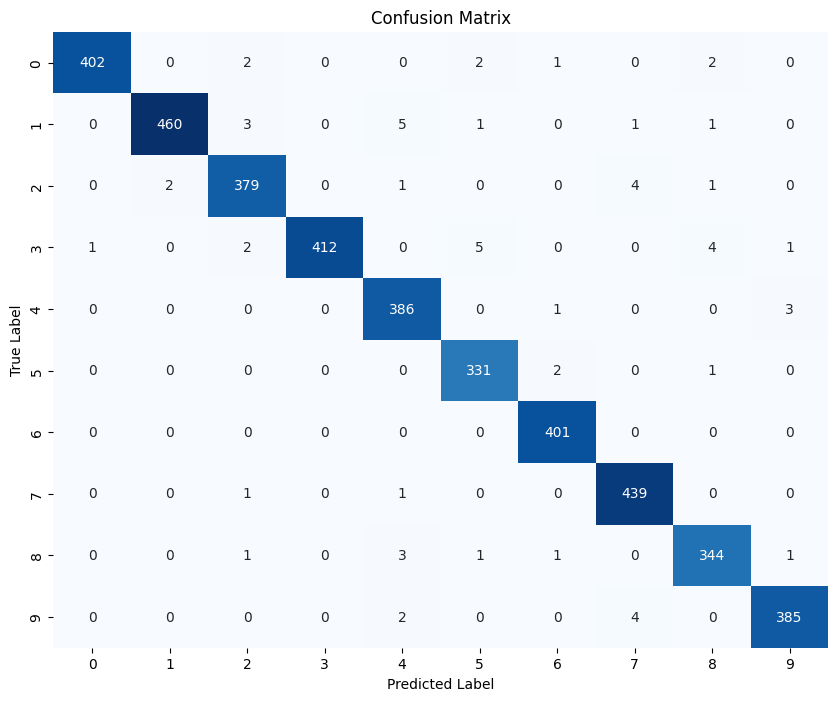


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       409
           1       1.00      0.98      0.99       471
           2       0.98      0.98      0.98       387
           3       1.00      0.97      0.98       425
           4       0.97      0.99      0.98       390
           5       0.97      0.99      0.98       334
           6       0.99      1.00      0.99       401
           7       0.98      1.00      0.99       441
           8       0.97      0.98      0.98       351
           9       0.99      0.98      0.99       391

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



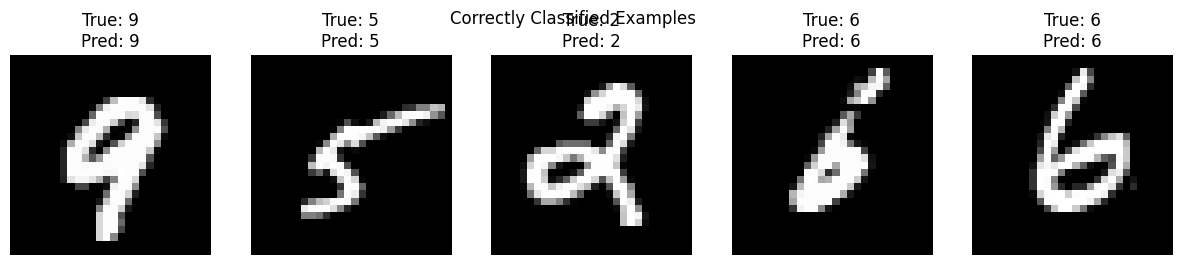

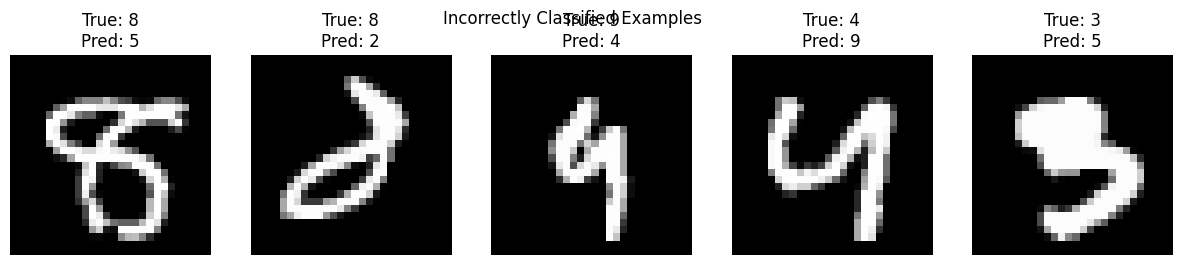

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import zipfile

# Set random seed
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow Version: {tf.__version__}")

print("\n--- Unzipping and Loading Data ---")

# CHANGE THIS to match exactly what you uploaded
zip_filename = "archive.zip"

# Check if file exists
if os.path.exists(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall("mnist_data")
    print("Files extracted successfully.")
else:
    print(f"⚠️ WARNING: {zip_filename} not found. Please upload it to the Files tab.")

# Load the training data using Pandas
try:
    # Modified to use the available mnist_train_small.csv
    data_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
    # Assuming the first column is the label and there's no header row
    data_df.rename(columns={0: 'label'}, inplace=True)
    print(f"Data Loaded. Shape: {data_df.shape}")
except FileNotFoundError:
    print("Could not find 'train.csv'. Check the extracted folder name or provide the correct path.")
print("\n--- Preprocessing Images ---")

# Separate labels (y) and pixels (x)
y_full = data_df['label'].values
x_full = data_df.drop(columns=['label']).values

# Normalization: Scale pixel values 0-255 -> 0-1
x_full = x_full.astype("float32") / 255.0

# Reshape: Convert flat 784 vectors to 28x28x1 images
x_full = x_full.reshape(-1, 28, 28, 1)

# Create our own Train/Test split
# Kaggle's 'test.csv' has no labels, so we can't use it for the confusion matrix.
# We split the 'train.csv' data instead: 80% Train, 20% Test.
x_train, x_test, y_train, y_test = train_test_split(
    x_full, y_full, test_size=0.2, random_state=42
)

print(f"Training set: {x_train.shape}")
print(f"Test/Validation set: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print("\n--- Building CNN Model ---")

model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    # Block 1
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten & Dense
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()
print("\n--- Training Model ---")

BATCH_SIZE = 128
EPOCHS = 10

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Visualization
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

plot_training_history(history)
print("\n--- Evaluating Model ---")

# Predict
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Display Examples
def plot_predictions(x, y_true, y_pred, title, num_images=5):
    plt.figure(figsize=(15, 3))
    # Find indices based on correct/incorrect
    if "Correct" in title:
        indices = np.where(y_true == y_pred)[0]
    else:
        indices = np.where(y_true != y_pred)[0]

    indices = indices[:num_images]

    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_predictions(x_test, y_test, y_pred, "Correctly Classified Examples")
plot_predictions(x_test, y_test, y_pred, "Incorrectly Classified Examples")
